# Colombia


In [1]:
import os
import pandas as pd
import json
import gspread as gs
import warnings

from utils.clean_historical import wrangling_historical_data
from utils.clean_imports import wrangling
from utils.top_imports import top_importadores
from utils.data_anual import annual_data
from utils.vol_origenes import analisis_origenes

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

warnings.simplefilter("ignore")

                ### ~~~ ###
            ###     PATH     ###
                ### ~~~ ###

location_2013 = "./data/283525_Importaciones_2013.xlsx"
location_2014 = "./data/283525_Importaciones_2014.xlsx"
location_2015 = "./data/283525_Importaciones_2015.xlsx"
location_2016 = "./data/283525_Importaciones_2016.xlsx"
location_2017 = "./data/283525_Importaciones_2017.xlsx"
location_2018 = "./data/283525_Importaciones_2018.xlsx"
location_2019 = "./data/283525_Importaciones_2019.xlsx"
location_2020 = "./data/283525_Importaciones_2020.xlsx"
location_2021 = "./data/283525_Importaciones_2021.xlsx"
location_2022 = "./data/283525_Importaciones_2022.xlsx"

                ### ~~~ ###
            ###     DATA     ###
                ### ~~~ ###

data2013 = pd.read_excel(location_2013, engine="openpyxl")
data2014 = pd.read_excel(location_2014, engine="openpyxl")
data2015 = pd.read_excel(location_2015, engine="openpyxl")
data2016 = pd.read_excel(location_2016, engine="openpyxl")
data2017 = pd.read_excel(location_2017, engine="openpyxl")
data2018 = pd.read_excel(location_2018, engine="openpyxl")
data2019 = pd.read_excel(location_2019, engine="openpyxl")
data2020 = pd.read_excel(location_2020, engine="openpyxl")
data2021 = pd.read_excel(location_2021, engine="openpyxl")
data2022 = pd.read_excel(location_2022, engine="openpyxl")


In [2]:
# MERGE
dfs_historical = [data2013, data2014, data2015, data2016, data2017,
       data2018, data2019, data2020, data2021] # data2022 funciona diferente

print("Este df tiene (filas, col):\n___________________")

for df in dfs_historical:
    print(f"> {df['Fecha'][0].year}: {df.shape}\n~~~~~~~~~~~~~~~~~~~")


Este df tiene (filas, col):
___________________
> 2013: (82, 28)
~~~~~~~~~~~~~~~~~~~
> 2014: (69, 28)
~~~~~~~~~~~~~~~~~~~
> 2015: (94, 28)
~~~~~~~~~~~~~~~~~~~
> 2016: (83, 28)
~~~~~~~~~~~~~~~~~~~
> 2017: (100, 28)
~~~~~~~~~~~~~~~~~~~
> 2018: (98, 28)
~~~~~~~~~~~~~~~~~~~
> 2019: (92, 28)
~~~~~~~~~~~~~~~~~~~
> 2020: (55, 28)
~~~~~~~~~~~~~~~~~~~
> 2021: (70, 28)
~~~~~~~~~~~~~~~~~~~


In [3]:
col = [col for col in data2013.columns]
col

# data2013.head(2)


['Operación',
 'Fecha',
 'NANDINA',
 'Probable Importador',
 'Factura',
 'Aduana',
 'Vía Transporte',
 'Nombre Transportista',
 'País de Origen',
 'Pais de Procedencia',
 'Cantidad',
 'Unidad de Medida',
 'FOB U$S',
 'FOB Unitario U$S',
 'U$S CIF',
 'U$S Unitario',
 'Flete U$S',
 'Kgs. Netos',
 'Kgs. Brutos',
 'Descripción de Mercadería',
 'Bultos',
 'Arancel',
 'IVA',
 'Otros',
 'Probable Proveedor',
 'Proveedor - Dirección',
 'Proveedor - Localidad',
 'Proveedor - Contacto']

In [4]:
results_dfs = wrangling_historical_data(dfs_historical)
results_df = wrangling(data2022)
results_dfs.append(results_df)



> MUNGING HISTORICAL DATA:

~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2013
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2014
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2015
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2016
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2017
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2018
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio...
~ Dropping outliers...
~ Dropping nulls...
> Done with: 2019
~~~~~~~~~~~~~~~~~~~
~ Limpiando NCMs...
~ Creando columna de precio

In [5]:
print("> Estadísticos del precio en el año per ton:\n___________________")

last_iterated_year = None

for df in results_dfs:
    if df is None or df.empty:
        print(
            f"<!!!> No data available for {last_iterated_year+1}\n~~~~~~~~~~~~~~~~~~~")
    else:
        year = df['Fecha'].iloc[0].year
        print(
            f"- En el {year}:\n{df['U$S Unitario'].describe()}\n~~~~~~~~~~~~~~~~~~~")
        last_iterated_year = year


> Estadísticos del precio en el año per ton:
___________________
- En el 2013:
count    33.000000
mean      1.004242
std       0.051358
min       0.920000
25%       0.950000
50%       1.000000
75%       1.050000
max       1.080000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2014:
count    27.000000
mean      1.007778
std       0.049562
min       0.950000
25%       0.960000
50%       1.030000
75%       1.035000
max       1.110000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2015:
count    60.000000
mean      0.754667
std       0.318218
min       0.240000
25%       0.410000
50%       0.930000
75%       0.990000
max       1.180000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2016:
count    49.000000
mean      0.699388
std       0.276107
min       0.240000
25%       0.390000
50%       0.840000
75%       0.850000
max       1.130000
Name: U$S Unitario, dtype: float64
~~~~~~~~~~~~~~~~~~~
- En el 2017:
count    71.000000
mean      0.663803

In [6]:
results_dfs[-1].head(2)

,NANDINA,Fecha,País de Origen,País de Procedencia,Probable Importador,Probable Proveedor,Aduana,Transporte,País de Compra,U$S CIF,CIF Unitario,U$S FOB,FOB Unitario,Flete,Seguro,Kgs. Netos,Kgs. Brutos,Cantidad,Unidad,U$S Unitario
0,283525,2022-01-13,China,China,RIVETO S A S,RIVETO LLC,BUENAVENTURA,MARITIMA,ESTADOS UNIDOS,137735.0,0.68,116341.25,0.57,21343.75,50.0,203750.0,203913.0,203750.0,KILOGRAMO,0.68
2,283525,2022-01-17,China,China,RIVETO S A S,RIVETO LLC,BUENAVENTURA,MARITIMA,ESTADOS UNIDOS,84000.0,0.56,58443.00,0.39,25500.00,57.0,150000.0,150600.0,150000.0,KILOGRAMO,0.56


In [7]:
annual_data = annual_data(results_dfs)
annual_data


- 2013 appended.
- 2014 appended.
- 2015 appended.
- 2016 appended.
- 2017 appended.
- 2018 appended.
- 2019 appended.
- 2020 appended.
- 2021 appended.
- 2022 appended.
~~~~~~~~~~~~~~~~~~~
> Transition dictionary:
- NCM: ['283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525', '283525']

- Año: [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

- Volumen Total: [3096.0, 2150.0, 6228.01, 6114.0, 6764.13, 6186.0, 5698.15, 1036.77, 1816.25, 8123.75]



,Año,NCM,Volumen Total
0,2013,283525,3096.00
1,2014,283525,2150.00
2,2015,283525,6228.01
3,2016,283525,6114.00
4,2017,283525,6764.13
5,2018,283525,6186.00
6,2019,283525,5698.15
7,2020,283525,1036.77
8,2021,283525,1816.25
9,2022,283525,8123.75


In [8]:
top_importadores = top_importadores(results_dfs)
top_importadores


- Done with: COLGATE PALMOLIVE COMPANIA COD. UAP 052 (2013) 
- Done with: JGB S.A. (2013) 
- Done with: JGB S.A. (2014) 
- Done with: COLGATE PALMOLIVE COMPANIA COD. UAP 052 (2014) 
- Done with: FACTORES Y MERCADEO LTDA. (2014) 
- Done with: COLGATE PALMOLIVE COMPANIA COD. UAP 052 (2015) 
- Done with: CARBONE RODRIGUEZ & CIA S.C.A ITALCOL S. (2015) 
- Done with: JGB S.A. (2015) 
- Done with: FACTORES Y MERCADEO LTDA. (2015) 
- Done with: CADIEP DISTRIBUCIONES LTDA (2015) 
- Done with: GIPSON  LTDA (2015) 
- Done with: QUIMICA INDUSTRIAL DEL SUR CIA LTDA (2015) 
- Done with: COLGATE PALMOLIVE COMPANIA COD. UAP 052 (2016) 
- Done with: CADIEP DISTRIBUCIONES LTDA (2016) 
- Done with: JGB S.A. (2016) 
- Done with: CARBONE RODRIGUEZ & CIA S.C.A ITALCOL S. (2016) 
- Done with: QUIMICA INDUSTRIAL DEL SUR CIA LTDA (2016) 
- Done with: CARBONE RODRIGUEZ & CIA S.C.A ITALCOL S. (2017) 
- Done with: COLGATE PALMOLIVE COMPANIA COD. UAP 052 (2017) 
- Done with: JGB S.A. (2017) 
- Done with: NUTRICIO

,Año,Importador,Participacion,Precio Promedio,Proveedores,Volumen Total (TN)
0,2013,COLGATE PALMOLIVE COMPANIA COD. UAP 052,93%,1030.0,"JIANGYIN CHENGXING INTERNATIONAL TRADING CO.,LTD., JIANGYIN CHENGXING INTERNATIONAL TRADING CO,,LTD, JIANGYIN CHENGXING INTERNATIONAL TRADING CO.,LTD, JIANGYIN CHENGXING INTERNATIONAL TRADING CO., LTD, INNOPHOS MEXICANA, S. DE R.L. DE C.V., JIANGYIN CHENGXING INTERNATIONAL TRADING CO., LTD., INNOPHOS MEXICANA, S. DE R.L. DE C., JIANGYIN CHENGXING INTERNATIONAL TRADING CO LTD, JIANGYIN CHENGXING INTERNATIONAL TRADING CO, JIANGYIN CHENGXING INTERNATIONAL TR, INNOPHOS MEXICANA, S. DE R. L. DE C. V., INNOPHOS MEXICANA, S. DE R.L. DE C. V., INNOPHOS INC.",2880.00
1,2013,JGB S.A.,7%,940.0,"LIANYUNGANG NIUSUN INTERNATIONAL TRADE CO, LTD, LIANYUNGANG NIUSUN INTERNATIONAL TRADE CO.,LTD, LIANYUNGANG NIUSUN INTERNATIONAL TRADE CO., LTD",216.00
1,2014,COLGATE PALMOLIVE COMPANIA COD. UAP 052,88%,1030.0,"INNOPHOS MEXICANA, S. DE R.L. DE C.V, JIANGYIN CHENGXING INTERNATIONAL TRADING CO., LTD., INNOPHOS MEXICANA, S. DE R.L. DE C., INNOPHOS MEXICANA, S. DE R.L. DE C.V., JIANGYIN CHENGXING INTERNATIONAL TRADING CO.,LTD., JIANGYIN CHENGXING INTERNATIONAL TRADING CO., LTD",1900.00
0,2014,JGB S.A.,11%,960.0,"LIANYUNGANG NIUSUN INTERNATIONAL TRADE CO, LTD, LIANYUNGANG NIUSUN INTERNATIONAL TRADE CO., LTD, LIANYUNGANG NIUSUN INTERNATIONAL TRADE CO.,LTDA, LIANYUNGANG NIUSUN INTERNATIONAL TRADES CO., LTD",240.00
2,2014,FACTORES Y MERCADEO LTDA.,0%,1080.0,"LIANYUNGANG DONGTAI FOOD INGREDIENTS CO., LTD.",10.00
1,2015,CARBONE RODRIGUEZ & CIA S.C.A ITALCOL S.,52%,410.0,MASTERCHEM LIMITED,3248.01
0,2015,COLGATE PALMOLIVE COMPANIA COD. UAP 052,37%,1040.0,"JIANGYIN CHENGXING INTERNATIONAL TRADING CO.,LTD., INNOPHOS MEXICANA, S. DE R.L. DE C.V, JIANGYIN CHENGXING INTERNATIONAL TRADING CO., LTD., INNOPHOS MEXICANA, S. DE R.L. DE C.V.",2300.00
6,2015,QUIMICA INDUSTRIAL DEL SUR CIA LTDA,6%,260.0,"NORBRIGHT INDUSTRY CO., LTD, NORBRIGHT INDUSTRY CO., LTD.",375.00
3,2016,CARBONE RODRIGUEZ & CIA S.C.A ITALCOL S.,49%,400.0,MASTERCHEM LIMITED,2970.00
0,2016,COLGATE PALMOLIVE COMPANIA COD. UAP 052,34%,920.0,"INNOPHOS MEXICANA, S. DE R.L. DE C.V., JIANGYIN CHENGXING INTERNATIONAL TRADING CO., LTD., JIANGYIN CHENGXING INTERNATIONAL TRADING CO.,LTD, JIANGYIN CHENGXING INTERNATIONAL TRADING CO.LTD",2100.00


In [9]:
analisis_origenes = analisis_origenes(results_dfs)
analisis_origenes


- Done with: China (2013) 
- Done with: México (2013) 
- Done with: Estados Unidos (2013) 
- Done with: China (2014) 
- Done with: México (2014) 
- Done with: China (2015) 
- Done with: México (2015) 
- Done with: México (2016) 
- Done with: China (2016) 
- Done with: China (2017) 
- Done with: México (2017) 
- Done with: Túnez (2017) 
- Done with: Estados Unidos (2018) 
- Done with: China (2018) 
- Done with: México (2018) 
- Done with: México (2019) 
- Done with: China (2019) 
- Done with: España (2019) 
- Done with: China (2020) 
- Done with: Estados Unidos (2020) 
- Done with: España (2020) 
- Done with: China (2021) 
- Done with: China (2022) 
- Done with: Perú (2022) 
~~~~~~~~~~~~~~~~~~~
> Current dataframe of the origins of each year:


,NCM,Año,Pais,Volumen Total (TN),Participacion en Vol. Total,No. Importaciones
0,283525,2013,China,1996.00,64%,24
1,283525,2013,México,1000.00,32%,8
2,283525,2013,Estados Unidos,100.00,3%,1
0,283525,2014,China,1250.00,58%,19
1,283525,2014,México,900.00,42%,8
0,283525,2015,China,5428.01,87%,51
1,283525,2015,México,800.00,13%,9
0,283525,2016,China,5614.00,92%,44
1,283525,2016,México,500.00,8%,5
0,283525,2017,China,5814.08,86%,59


# Graphs

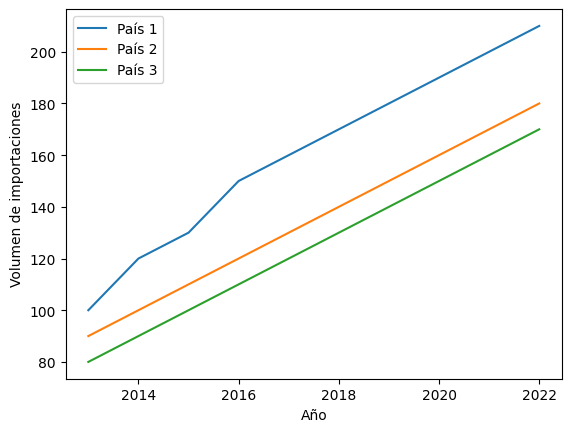

In [10]:
# GRAPHS (analisis_origenes)
import matplotlib.pyplot as plt

# Datos de ejemplo
volumenes = [[100, 120, 130, 150, 160, 170, 180, 190, 200, 210],
             [90, 100, 110, 120, 130, 140, 150, 160, 170, 180],
             [80, 90, 100, 110, 120, 130, 140, 150, 160, 170]]

paises = ['País 1', 'País 2', 'País 3']

# Crear figura y ejes
fig, ax = plt.subplots()

# Graficar líneas para cada país
for i in range(len(volumenes)):
    ax.plot(range(2013, 2023), volumenes[i], label=paises[i])

# Configurar leyenda y etiquetas de los ejes
ax.legend()
ax.set_xlabel('Año')
ax.set_ylabel('Volumen de importaciones')

plt.show()


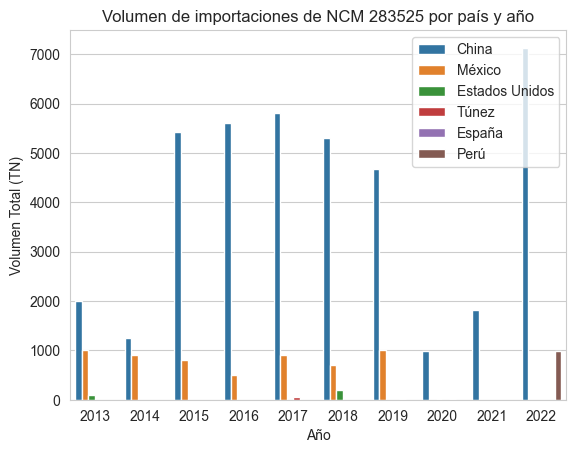

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

# # Filtrar datos por NCM
# df_ncm = df[df['NCM']==283525]


# Gráfico de barras agrupado por país
sns.barplot(x='Año', y='Volumen Total (TN)', hue='Pais', data=analisis_origenes)

# Título del gráfico
plt.title('Volumen de importaciones de NCM 283525 por país y año')
plt.legend(loc='upper right')

# Mostrar gráfico
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


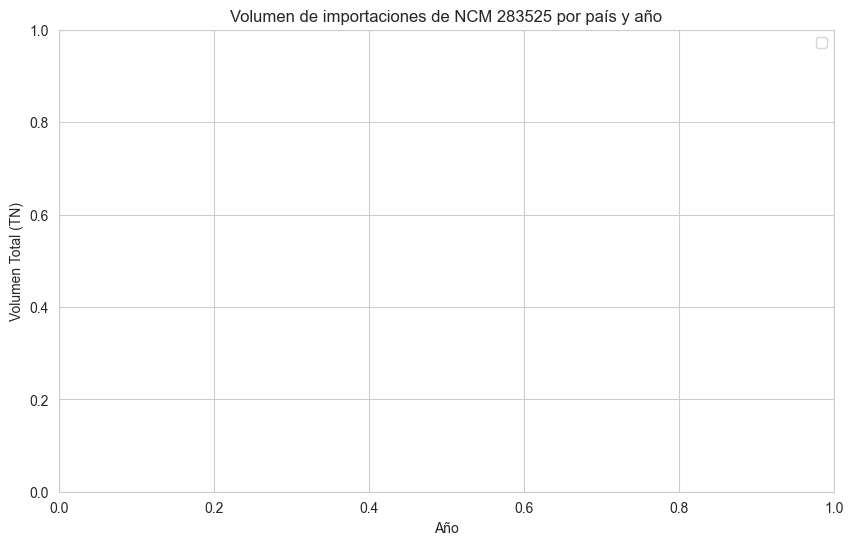

In [12]:
# Filtrar datos por NCM y agrupar por país
df_ncm_pais = analisis_origenes[analisis_origenes['NCM']==283525].groupby('Pais')

# Gráfico de línea por país
fig, ax = plt.subplots(figsize=(10,6))
for pais, data in df_ncm_pais:
    ax.plot(data['Año'], data['Volumen Total (TN)'], label=pais)

# Título del gráfico y etiquetas de los ejes
ax.set_title('Volumen de importaciones de NCM 283525 por país y año')
ax.set_xlabel('Año')
ax.set_ylabel('Volumen Total (TN)')

# Leyenda del gráfico
ax.legend()

# Mostrar gráfico
plt.show()